In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.metrics import categorical_accuracy, CategoricalAccuracy

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy 

from tensorflow.keras.callbacks import TensorBoard

# Monitoring and Improving Neural Networks
## Live Demos

In [3]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

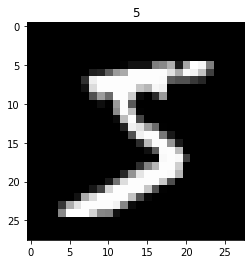

In [4]:
plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])
plt.show()

In [5]:
# Important step - otherwise there will be model exploding!

# train_images = train_images / 255.0
# test_images = test_images / 255.0

# Float16 - to get more data in GPU memory
train_images = (train_images / 255.0).astype(np.float16)
test_images = (test_images / 255.0).astype(np.float16)

In [6]:
test_images.dtype

dtype('float16')

In [7]:
DROPOUT_RATE = 0.1

In [8]:
model = Sequential([
    Input(shape=train_images[0].shape), # Images with the same shape
    Flatten(),
    Dense(units=20, activation=tf.keras.activations.relu),
    Dropout(DROPOUT_RATE),
    Dense(units=50, activation=tf.keras.activations.relu),
    Dropout(DROPOUT_RATE),
    Dense(units=30, activation=tf.keras.activations.relu),
    Dropout(DROPOUT_RATE),
    Dense(units=10, activation=tf.keras.activations.softmax)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0

In [10]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = SparseCategoricalCrossentropy(),
    metrics = [SparseCategoricalAccuracy()]
)

In [11]:
history = model.fit(
    x = train_images,
    y = train_labels,
    epochs = 20,
    batch_size = 8,
    validation_split = 0.1,
#     initial_epoch = 0 # Where to start from remebered data
    callbacks = [TensorBoard()]
)
# Use "tensorboard --logdir logs" to visualize

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 7s 132us/sample - loss: 0.5128 - sparse_categorical_accuracy: 0.8404 - val_loss: 0.1771 - val_sparse_categorical_accuracy: 0.9460
Epoch 2/20
54000/54000 [==============================] - 6s 118us/sample - loss: 0.3174 - sparse_categorical_accuracy: 0.9063 - val_loss: 0.1597 - val_sparse_categorical_accuracy: 0.9492
Epoch 3/20
54000/54000 [==============================] - 7s 121us/sample - loss: 0.2836 - sparse_categorical_accuracy: 0.9159 - val_loss: 0.1443 - val_sparse_categorical_accuracy: 0.9573
Epoch 4/20
54000/54000 [==============================] - 7s 133us/sample - loss: 0.2627 - sparse_categorical_accuracy: 0.9216 - val_loss: 0.1435 - val_sparse_categorical_accuracy: 0.9577
Epoch 5/20
54000/54000 [==============================] - 6s 116us/sample - loss: 0.2530 - sparse_categorical_accuracy: 0.9253 - val_loss: 0.1404 - val_sparse_categorical_accuracy: 0.9597
Epoch 6/20


In [12]:
model.predict(train_images[0:10])

array([[2.53822224e-11, 2.68205707e-08, 1.21542465e-08, 2.28108410e-02,
        2.89765239e-07, 9.76992130e-01, 6.58180566e-10, 1.17620242e-08,
        6.76912350e-07, 1.95968794e-04],
       [9.99977231e-01, 3.03968054e-21, 1.36513529e-06, 5.33736504e-08,
        3.98491171e-11, 3.03019306e-06, 1.18848095e-06, 3.95486524e-08,
        1.20188787e-07, 1.70578041e-05],
       [1.54890836e-06, 5.02809962e-05, 6.40183687e-04, 8.10560159e-05,
        9.92011726e-01, 9.68469481e-04, 6.83532053e-05, 7.23249628e-04,
        1.49078158e-04, 5.30606415e-03],
       [9.88821710e-16, 9.99993086e-01, 2.06581626e-06, 4.02898962e-07,
        2.11621778e-08, 1.08419087e-08, 4.41097159e-12, 3.88202943e-06,
        4.60089950e-07, 1.43299745e-08],
       [4.04594414e-10, 7.48722151e-09, 8.77998502e-07, 6.38609490e-05,
        1.41810146e-04, 7.77103594e-07, 4.17201560e-12, 1.90681225e-04,
        2.89010563e-06, 9.99599159e-01],
       [2.43473153e-07, 1.97736426e-05, 9.87254858e-01, 1.08868359e-02,
   

In [13]:
test_predicitons = model.predict_classes(test_images[:10])
test_predicitons

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [14]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [15]:
(test_predicitons == test_labels[:10]).sum()/len(test_predicitons)

0.9

In [16]:
history.history

{'loss': [0.5128360241168972,
  0.3174039922994217,
  0.28361434736363245,
  0.2626590004423224,
  0.2529879580963968,
  0.24072180162861737,
  0.23321913039580383,
  0.23102821238042898,
  0.22388747839993126,
  0.21798040645558567,
  0.2136080963900081,
  0.2117332270298179,
  0.20675886658539444,
  0.20487876252011242,
  0.2027684640031032,
  0.20002540795003654,
  0.19670964845934888,
  0.19344366455755868,
  0.19070311443436205,
  0.1890994156023037],
 'sparse_categorical_accuracy': [0.8403519,
  0.9062778,
  0.9159074,
  0.92164814,
  0.92531484,
  0.92848146,
  0.9300926,
  0.931037,
  0.9329815,
  0.9346667,
  0.93635184,
  0.9364259,
  0.9382222,
  0.93825924,
  0.9388704,
  0.93894446,
  0.9413148,
  0.9421667,
  0.94366664,
  0.9439074],
 'val_loss': [0.1771078779984576,
  0.15969311605533584,
  0.14428555940122653,
  0.1434834624567496,
  0.14035031519884553,
  0.13673819965601433,
  0.14553013956616634,
  0.12897869599692058,
  0.12746224833846403,
  0.14522281982560525,
 

[]

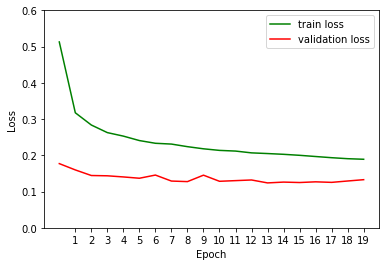

In [17]:
plt.plot(range(20), history.history["loss"], c="g", label = "train loss")
plt.plot(range(20), history.history["val_loss"], c="r", label = "validation loss")

plt.xticks(list(range(1, 21)))
plt.ylim(0, 0.6)
plt.legend()

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot()